In [1]:
import sys
import os

sys.path.append(os.path.abspath("../..")) #make the folder "automl" part of this

RESULTS_PATH = 'results.csv'


In [2]:
experiment_path = 'data\\experiments\\HyperparameterOptimizationPipeline_13'

In [3]:
from automl.loggers.result_logger import ResultLogger

results_of_configurations : dict[str, ResultLogger] = {}

for configuration_name in os.listdir(experiment_path):
    configuration_path = os.path.join(experiment_path, configuration_name)
    
    if os.path.isdir(configuration_path):  # Ensure it's a file, not a subdirectory
        
        results_of_configurations[configuration_name] = ResultLogger(input={
                                        "logger_directory" : configuration_path,
                                        "filename" : RESULTS_PATH
                                      })
        results_of_configurations[configuration_name].proccess_input()


Opening a log in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_1, with name:
Type of object with name: <class 'automl.loggers.result_logger.ResultLogger'> and name passed: 
ResultLogger: Created logger in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_1
ResultLogger: Results dataframe with filename results.csv already existed with columns Index(['episode', 'episode_steps', 'avg_reward', 'total_reward'], dtype='object')
Opening a log in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2, with name:
Type of object with name: <class 'automl.loggers.result_logger.ResultLogger'> and name passed: 
ResultLogger: Created logger in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2
ResultLogger: Results dataframe with filename results.csv already existed with columns Index(['episode', 'episode_steps', 'avg_reward', 'total_reward'], dtype='object')
Opening a log in dir

In [4]:
print(f"Configurations:  {results_of_configurations.keys()}")

Configurations:  dict_keys(['configuration_1', 'configuration_2', 'configuration_3', 'configuration_4', 'configuration_5', 'configuration_6', 'configuration_7'])


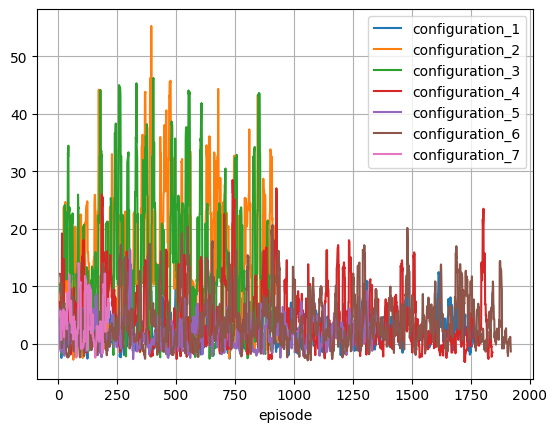

In [5]:
import matplotlib.pyplot as plt


for name, results_logger in results_of_configurations.items():

    #results_logger.plot_graph(x_axis='episode', y_axis=[('total_reward', name)], to_show=False)
    results_logger.plot_confidence_interval(x_axis='episode', y_column='total_reward',show_std=False, to_show=False, y_values_label=name)
    
plt.show()

In [6]:
configurations_to_study = ["configuration_2", "configuration_3"]

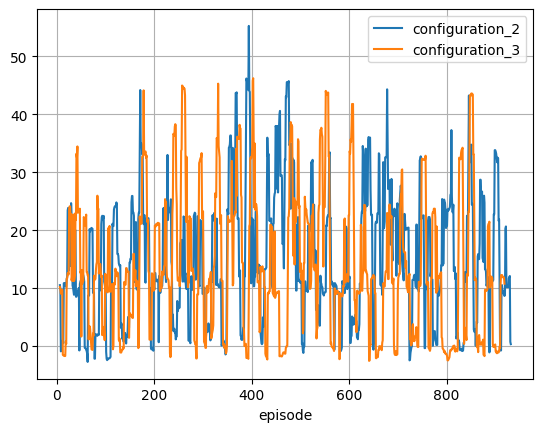

In [7]:


for configuration_name in configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]

    #results_logger.plot_graph(x_axis='episode', y_axis=[('total_reward', name)], to_show=False)
    results_logger.plot_confidence_interval(x_axis='episode', y_column='total_reward',show_std=False, to_show=False, y_values_label=configuration_name)
    
plt.show()

In [8]:
agents_to_study : dict[str, ResultLogger]= {}

for configuration_name in configurations_to_study:
    
    results_logger = results_of_configurations[configuration_name]
    
    for agent_name in ["agent_1", "agent_2"]:
      
        agent_results_logger = ResultLogger(input={
                                            "logger_directory" : f"{results_logger.lg.logDir}\\{agent_name}",
                                            "filename" : RESULTS_PATH
                                          })

        agents_to_study[f"{configuration_name}_{agent_name}"] = agent_results_logger
        
        agent_results_logger.proccess_input()


Opening a log in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2\agent_1, with name:
Type of object with name: <class 'automl.loggers.result_logger.ResultLogger'> and name passed: 
ResultLogger: Created logger in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2\agent_1
ResultLogger: Results dataframe with filename results.csv already existed with columns Index(['episode', 'total_reward', 'episode_steps', 'avg_reward'], dtype='object')
Opening a log in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2\agent_2, with name:
Type of object with name: <class 'automl.loggers.result_logger.ResultLogger'> and name passed: 
ResultLogger: Created logger in directory: data\experiments\HyperparameterOptimizationPipeline_13\configuration_2\agent_2
ResultLogger: Results dataframe with filename results.csv already existed with columns Index(['episode', 'total_reward', 'episode_steps', 'avg_reward'], dtyp

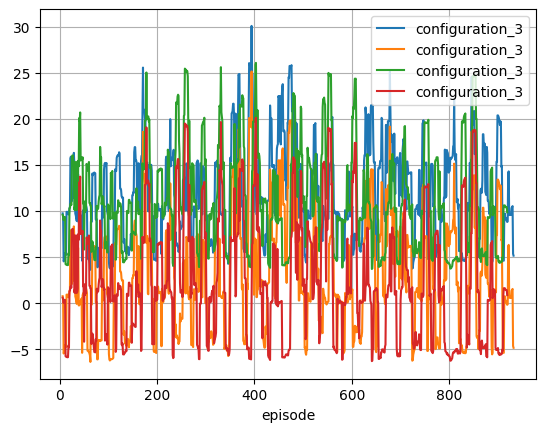

In [ ]:
for agent_name, agent_results_logger in agents_to_study.items():
    
    #results_logger.plot_graph(x_axis='episode', y_axis=[('total_reward', name)], to_show=False)
    agent_results_logger.plot_confidence_interval(x_axis='episode', y_column='total_reward',show_std=False, to_show=False, y_values_label=agent_name)
    
plt.show()